<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install texthero

In [2]:
#importing the required packages 
import pandas as pd
import texthero as hero

In [3]:
#loading the data into pandas dataframe 
df = pd.read_csv('https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv')
df.head()

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics


In [4]:
#examining the text data 
df.iloc[0][0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [5]:
#text data cleaning and processing

from texthero import preprocessing

#creating a pipeline
custom_pipeline = [preprocessing.fillna,
preprocessing.lowercase,
preprocessing.remove_punctuation,
preprocessing.remove_stopwords,
preprocessing.remove_whitespace, 
preprocessing.stem]

In [6]:
#creating a new column with the new data 
df['clean_text'] = df['text'].pipe(hero.clean, custom_pipeline)

In [7]:
#checking the cleaned text. 
df.iloc[0][2]

'claxton hunt first major medal british hurdler sarah claxton confid win first major medal next month european indoor championship madrid 25 year old alreadi smash british record 60m hurdl twice season set new mark 7 96 second win aaa titl quit confid said claxton take race come long keep train much think chanc medal claxton nation 60m hurdl titl past three year struggl translat domest success intern stage scotland born athlet own equal fifth fastest time world year last week birmingham grand prix claxton left european medal favourit russian irina shevchenko trail sixth spot first time claxton prepar campaign hurdl could explain leap form previous season 25 year old also contest long jump sinc move colchest london focus attent claxton see new train regim pay dividend european indoor take place 5 6 march'

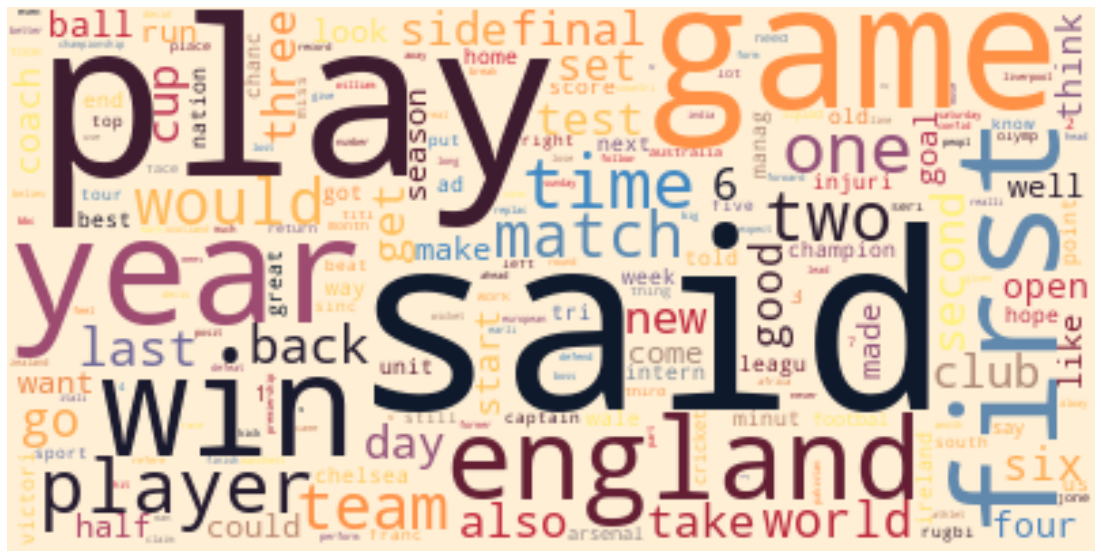

In [8]:
#visualizing the text using world cloud 
hero.wordcloud(df['clean_text'])

Since its a commentary text data, we have high #of words like said, year, play, player, first etc.

In [9]:
#named entity recognition 

hero.named_entities(df['clean_text'], package='spacy')

0      [(claxton hunt, ORG, 0, 12), (medal british hu...
1      [(sullivan, ORG, 0, 8), (sonia sullivan indic,...
2      [(100m titl athen, QUANTITY, 65, 80), (fourth,...
3      [(two, CARDINAL, 113, 116), (nutrit issu, PERS...
4      [(dibaba, GPE, 0, 6), (5 000m, MONEY, 13, 19),...
                             ...                        
732    [(agassi, PERSON, 0, 6), (second, ORDINAL, 7, ...
733    [(mauresmo, ORG, 0, 8), (two, CARDINAL, 42, 45...
734    [(one, CARDINAL, 38, 41), (5, CARDINAL, 94, 95...
735    [(warn secur britain, PERSON, 10, 28), (tel av...
736    [(molik wimbledon, PERSON, 24, 39), (maria sha...
Length: 737, dtype: object

In [10]:
#grouping top 5 words by topic 

NUM_TOP_WORDS = 5
df.groupby('topic')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

topic             
athletics  year       196
           olymp      195
           said       181
           athlet     171
           world      167
cricket    test       291
           play       249
           cricket    234
           day        231
           england    225
football   said       475
           game       407
           player     377
           play       358
           club       337
rugby      england    395
           said       262
           game       262
           wale       247
           ireland    229
tennis     6          353
           said       217
           open       195
           play       183
           year       168
Name: clean_text, dtype: int64

In [11]:
#tfidf
df['tfidf_clean_text'] = hero.tfidf(df['clean_text'])
df.head(2)

,text,topic,clean_text,tfidf_clean_text
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunt first major medal british hurdler...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run world sonia sullivan indic ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
#feature reduction using pca
df['pca_tfidf_clean_text'] = hero.pca(df['tfidf_clean_text'])

In [13]:
df['pca'] = (
            df['text']
            .pipe(hero.clean)
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   )

In [14]:

hero.scatterplot(df, col='pca', color='topic', title="PCA BBC Sport news")